# Statistical Thinking.


In [1]:
# loading modules
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline
#from scipy.stats import sem

#### 1. How many responders are there? Are there any missing values in any of the variables?

In [2]:
# reading csv
st = pd.read_csv('salary.csv')
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [3]:
#missing values
missing_values = st.isnull().sum().sum()
print('Number of missing values:',missing_values)

Number of missing values: 1


In [4]:
# Looking out my NaN value
st[st.salary.isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


#### 2. What is the lowest salary and highest salary in the group?

In [5]:
# Checking the lowest & highest salaries in the database. 
lowest = st[st.salary.notnull()].sort_values('salary')[['salary']].head(1)
highest = st[st.salary.notnull()].sort_values('salary')[['salary']].tail(1)

print('The lowest salary is: ', lowest.salary.values)
print('the highest salary is: ', highest.salary.values)

The lowest salary is:  [29000.]
the highest salary is:  [96156.]


#### 3. What is the mean salary for the sample? Include the standard error of the mean.

In [6]:
# Filling my NaN value with the mean of the column
st = st.apply(lambda x: x.fillna(x.mean())) 

In [7]:
mean_salary = st.salary.mean()
st_err_m = st["salary"].sem()

print('The mean of salary is: $',mean_salary)
print('The standard error of the mean of salary is: $',st_err_m)

The mean of salary is: $ 50863.22009783626
The standard error of the mean of salary is: $ 558.9715980665014


#### 4. What is the standard deviation for the years worked?

In [8]:
std_yearsworked = st.yearsworked.std()
print('The standard deviation of years worked is: ', std_yearsworked)

The standard deviation of years worked is:  9.444695144169813


#### 5. What is the median salary for the sample?

In [9]:
median_salary = st.salary.median()
print('The median salary is: $', median_salary)

The median salary is: $ 50165.5


#### 6. What is the interquartile range for salary in the sample?

In [10]:
Q1 = st['salary'].quantile(0.25)
Q3 = st['salary'].quantile(0.75)
IQR = Q3 - Q1

print('The interquartile range for salary is: $', IQR)

The interquartile range for salary is: $ 20306.25


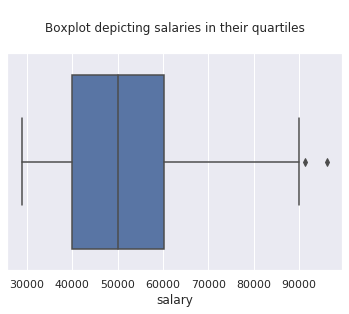

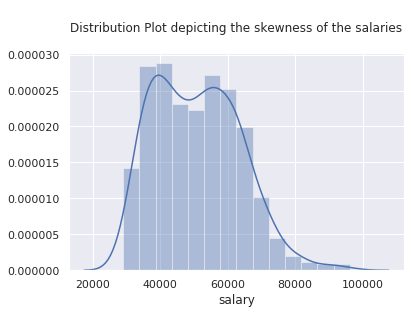

In [11]:
sns.set()
sns.boxplot(x='salary', data=st)
plt.title('\nBoxplot depicting salaries in their quartiles\n')
plt.show()

sns.distplot(st.salary)
plt.title('\nDistribution Plot depicting the skewness of the salaries\n')
plt.show()

#### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [12]:
st = st.rename(columns={'male':'gender'})
st.gender= ['male' if each == 1 else 'female' for each in st.gender]

In [13]:
gender = pd.DataFrame(st.groupby('gender').size()).reset_index()
gender = gender.rename(columns={0:"Total"})

gender

,gender,Total
0,female,128
1,male,386


#### 8. How many women are executives compared to men?

In [14]:
females = st[st.gender == 'female']
female_exec = len(females[females.position == 3])

male  = st[st.gender == 'male']
male_exec = len(male[male.position == 3])

print('Number of female executives: ', female_exec)
print('Number of male executives: ', male_exec)



Number of female executives:  19
Number of male executives:  192


#### 9. Create a histogram for the variable Salary.

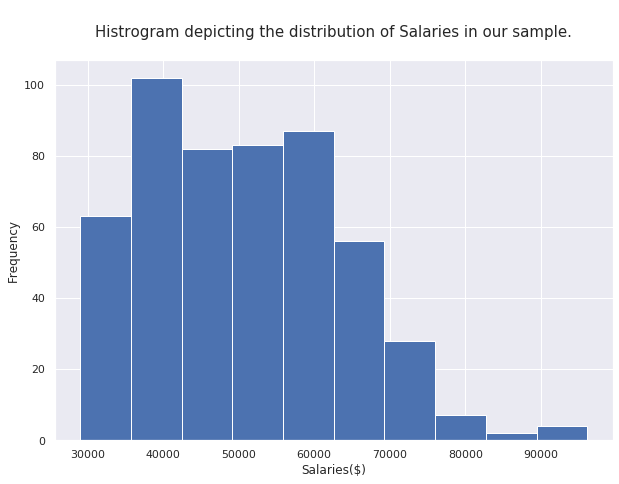

In [15]:
sns.set()
plt.figure(figsize = (10,7))
plt.hist(st['salary'])
plt.title('\nHistrogram depicting the distribution of Salaries in our sample.\n',fontsize=15)
plt.xlabel('Salaries($)')
plt.ylabel('Frequency')
plt.show()

#### 10. Examine the histogram and describe the distribution for Salary.

The distribution is more skewed to the right, this is accounted for in the graph by the bins 40000 to 60000. Fewer people are gaining more than 70000 in our data set.

#### 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

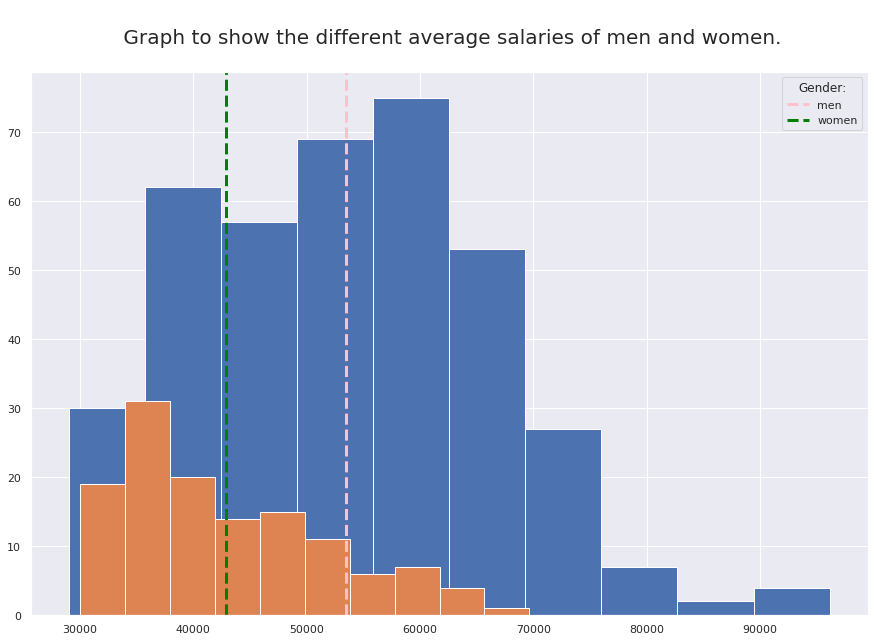

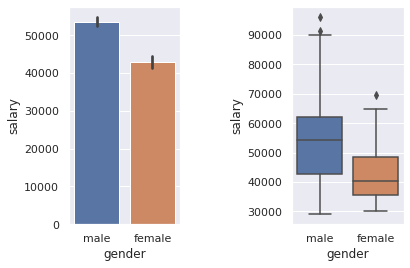

In [16]:
sns.set()
plt.figure(figsize=(15,10))
males = st[st.gender == 'male'].salary
females = st[st.gender== 'female'].salary
plt.hist(males, label='males')
plt.hist(females, label='females ')
plt.title('\n Graph to show the different average salaries of men and women.\n', fontsize = 20)
plt.axvline(males.mean(), color='pink', linestyle='dashed', linewidth=3)
plt.axvline(females.mean(), color='green', linestyle='dashed', linewidth=3)
plt.legend(title = 'Gender:', labels = ['men', 'women'])

fig, axes= plt.subplots(1, 2)
sns.barplot(x="gender", y="salary", data=st, ax= axes[0])
sns.boxplot(y='salary', x='gender', data=st, ax= axes[1])
plt.subplots_adjust(wspace=1)
plt.show()

In [17]:
contingency_table = pd.crosstab(
    st['gender'],
    st['salary'],
    margins = True
)
contingency_table

salary,29000.0,29500.0,30000.0,30001.0,30662.0,30927.0,31000.0,31577.0,32000.0,32944.0,...,80137.0,80760.0,82508.0,82878.0,83192.23438,89789.0,90082.0,91405.0,96156.0,All
gender,,,,,,,,,,,,,,,,,,,,,
female,0,0,1,1,1,0,3,1,3,1,...,0,0,0,0,0,0,0,0,0,128
male,1,1,2,1,0,1,1,0,2,0,...,1,1,1,1,1,1,1,1,1,386
All,1,1,3,2,1,1,4,1,5,1,...,1,1,1,1,1,1,1,1,1,514


#### 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

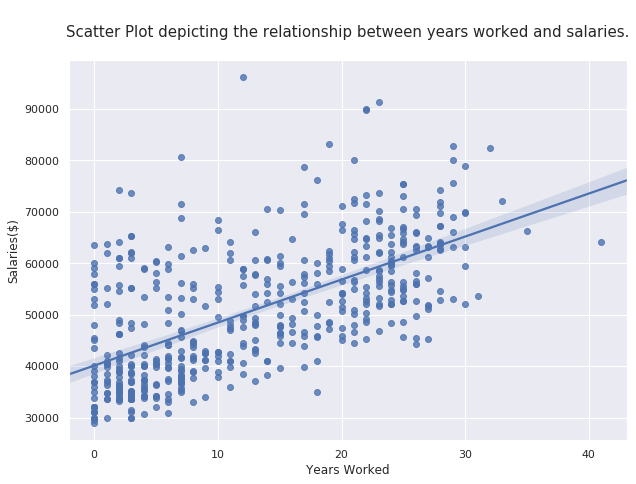

In [18]:
plt.figure(figsize = (10,7))
sns.regplot(st['yearsworked'],st['salary'])
plt.title('\nScatter Plot depicting the relationship between years worked and salaries.\n',fontsize=15)
plt.ylabel('Salaries($)')
plt.xlabel('Years Worked')
plt.show()

#### 13. What is the relationship between Years Worked and Salary?

- The are lot of points close to our regression line.
- There is a strong, positive, linear relationship between the years worked and salary. This means that as the years increase the more the money the individuals get paid

#### 14. Describe any patterns in the scatterplot.

- It has a positive linear relationship reason being that it is modeled using a line with a positive slope.
- The plot does not have clusters it looks like one strtched out blob.
- The graph does have few outliers were some people with less years worked earn more that people with more years this may be resukts of different positions or even the addition of skills and qualifications.


#### 15. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

In [19]:
lower = st[st.salary.notnull()].sort_values('salary')[['gender', 'salary']].head()
higher = st[st.salary.notnull()].sort_values('salary')[['gender', 'salary']].tail()

print('lower extremes:', lower.gender.values, lower.salary.values)

print('higher extremes: ', higher.gender.values, higher.salary.values)

lower extremes: ['male' 'male' 'male' 'female' 'male'] [29000. 29500. 30000. 30000. 30000.]
higher extremes:  ['male' 'male' 'male' 'male' 'male'] [83192.23438 89789.      90082.      91405.      96156.     ]


#### 16. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

correlation is 0.6231354820920552 with a p-value of 1.2747795189693407e-56


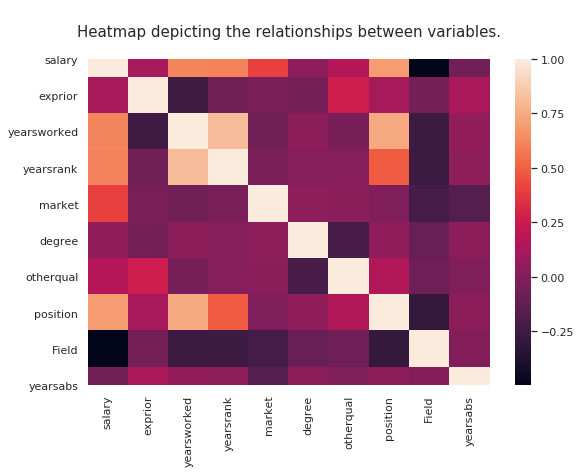

In [20]:
from scipy.stats.stats import pearsonr

corr, p_val= pearsonr(st.yearsworked, st.salary)
print('correlation is', corr, 'with a p-value of', p_val)

plt.figure(figsize=(9,6))
sns.heatmap(st.corr())
plt.title('\nHeatmap depicting the relationships between variables.\n',fontsize=15)
plt.show()

#### 17. Interpret the size and direction of the correlation statistic.

- The correlation between years worked and salary is 0.63, they are positively correlated reason being as years worked increases so does the salary. Since they are closer to 1 the the relationship is stronger.

#### 18. Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

In [21]:
import pingouin as pg
pg.corr(x=st['yearsworked'], y=st['salary'])

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,514,0.623,"[0.57, 0.67]",0.388,0.386,1.274780e-56,1.5e+53,1.0


TypeError: missing a required argument: 'y'

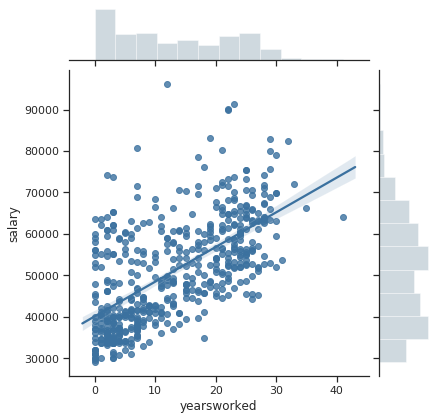

In [22]:
g = sns.JointGrid(data=st, x='yearsworked', y='salary')
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text('r = 0.45, p < .001', fontstyle='italic')

No, the relationship is not statistically significant.since we have a p-value of 0.00000124631. in this case we need to reject our null hypothesis.